<a href="https://colab.research.google.com/github/Resourcepaul/Project1/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import pandas as pd
import seaborn as sns

report_df=pd.read_csv('/content/drive/MyDrive/Bootcamp/sales_predictions.csv')
report_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) How many rows and columns?

In [55]:
#get rows and columns based on the shape of the data frame excluding the header
rows,columns=report_df.shape
#print rows
print(rows)
#print columns
print(columns)

8523
12


2) What are the datatypes of each variable?

In [56]:
#show all information of the dataframe including the datatype
report_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3) Are there duplicates? If so, drop any duplicates.

In [57]:
#automatically drop any duplicates based on identifiers and keeping only the first instance of the data entry
#automatically saves
report_df.drop_duplicates(keep='first',inplace=True)

4) Identify missing values.

In [58]:
# using the .info() function i can identify null/missing values based on the non-null count
report_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [59]:
# identify pattern of missing data

#all OUT010 are grocery stores and all grocery stores are small therefore all OUT010 are small
store1 = report_df['Outlet_Identifier']=='OUT010'
store_type= report_df['Outlet_Type']=='Grocery Store'

#all OUT035 are Location Tier 2 and all Tier 2 are small therefore all Tier2 are small
store2 = report_df['Outlet_Identifier']!='OUT035'
store_location= report_df['Outlet_Location_Type']=='Tier 2'

#filter out missing data
filter= report_df['Outlet_Size'].isna()

# get the sizes based on above filter
outlets=report_df.loc[store_type & ~filter,['Outlet_Size']]
outlets2=report_df.loc[store_location & ~filter,['Outlet_Size']]

# Fill OUT010 with value from above result
report_df.loc[store1 & report_df['Outlet_Size'].isna(),['Outlet_Size']]=outlets['Outlet_Size'].unique()

# Fill OUT045 with value from above result
report_df.loc[store2 & report_df['Outlet_Size'].isna(),['Outlet_Size']]=outlets2['Outlet_Size'].unique()

In [60]:
# some items are duplicated therefore you can extract some of the missing data from existing entries

#create new df for the getting the data
report2_df=report_df.drop(columns=['Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales'])
report2_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518     True
8519     True
8520     True
8521     True
8522     True
Length: 8523, dtype: bool

In [61]:
#remove missing data and duplicates in this oreder
report2_df.dropna(inplace=True)
report2_df.drop_duplicates(inplace=True)

# extract a dictionary using the item identifier as key and item weight as value
replace_value=report2_df.set_index('Item_Identifier').to_dict()['Item_Weight']

#map dictionary to df
report_df.Item_Weight = report_df.Item_Identifier.map(replace_value)
weight_missing = report_df['Item_Weight'].isna()

# unique items with missing data remain
#report_df.loc[weight_missing,['Item_Weight']]=report_df['Item_Weight'].mean()
report_df.loc[weight_missing,['Item_Weight']]

,Item_Weight
927,NaN
1922,NaN
4187,NaN
5022,NaN


In [62]:
from sklearn.impute import SimpleImputer
imputer =  SimpleImputer (strategy='mean')
report_df['Item_Weight']=imputer.fit_transform(report_df[['Item_Weight']])

6) Confirm that there are no missing values after addressing them.

In [63]:
report_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [64]:
#get unique values from column Item_Fat_Content
report_df['Item_Fat_Content']=report_df['Item_Fat_Content'].str.lower()
#make similar words uniform eg: LF and low fat to Low Fat
report_df=report_df.replace({'Item_Fat_Content':{'lf':'low fat','reg':'regular'}})

8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [65]:
report_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [66]:
print(report_df.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     12.875420         0.066132   140.992782                1997.831867   
std       4.645008         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.785000         0.026989    93.826500                1987.000000   
50%      12.650000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


#heatmap

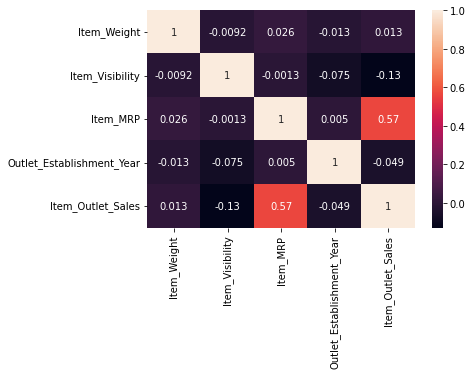

In [67]:
sns.heatmap(report_df.corr(),annot=True);

#Histogram

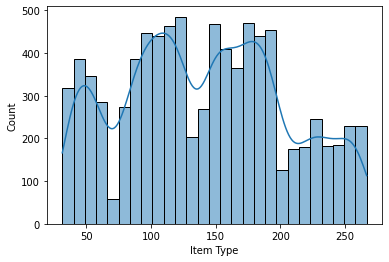

In [82]:
sns.histplot(data=report_df,x='Item_MRP',kde = True).set(xlabel='Item Type');

#Boxplot

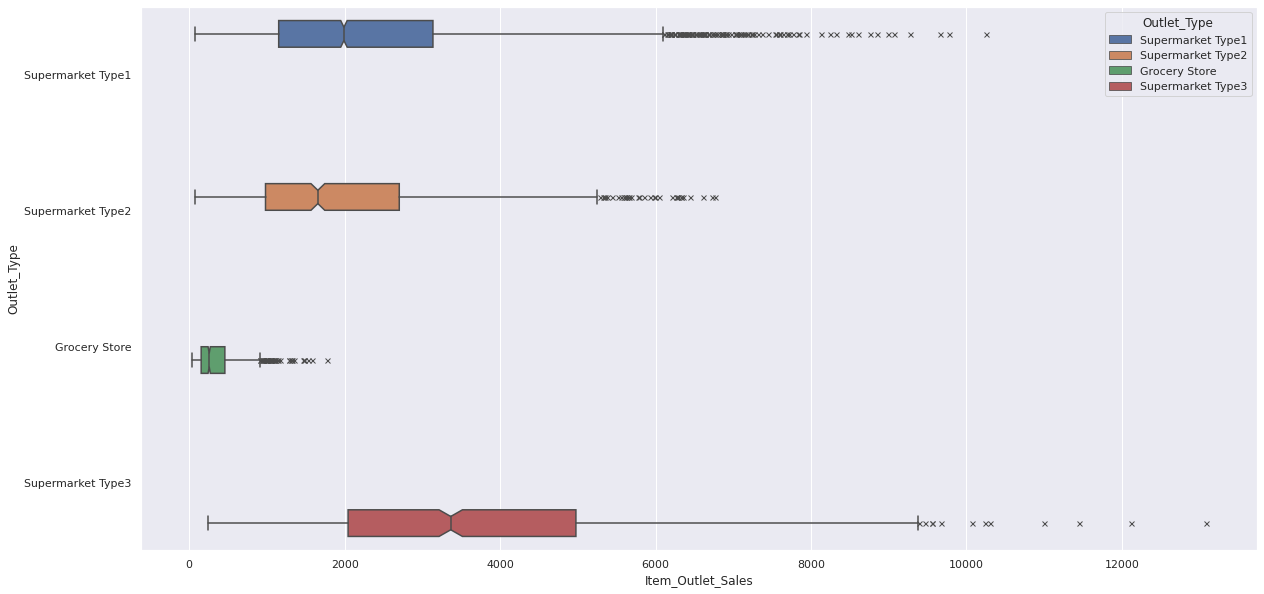

In [103]:
sns.boxplot(data=report_df,x='Item_Outlet_Sales',y='Outlet_Type',hue='Outlet_Type',notch=True,flierprops={"marker": "x"},);
sns.set(rc = {'figure.figsize':(10,10)});